In [23]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, '../../../')
from copy import deepcopy
import datetime
from helpers.ipython_helpers import (
    print_full
)
from helpers.rating_model_helpers import (
    RatingModelTrainer
)
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

# Read Data

In [2]:
original_features_df = pd.read_csv("../../../../data/credit_rating/intermediate_data/credit_rating_features_0.csv")

In [3]:
trainer = RatingModelTrainer(original_features_df)

In [4]:
trainer.make_dev_and_test_df(threshold_year=2005)

In [5]:
dt_model = DecisionTreeClassifier()
trainer.train_model(dt_model)

In [6]:
trainer.y_pred_bin = trainer.model.predict(trainer.X_test)

In [16]:
from sklearn.metrics import (
    f1_score,
    fbeta_score,
    recall_score,
    precision_score,
    roc_curve,
    roc_auc_score,
    classification_report,
    confusion_matrix
)
import itertools

In [10]:
print("F1 Score")
print(f1_score(trainer.y_test, trainer.y_pred_bin, average='macro'))

F1 Score
0.115278637234


/Users/wentaoxu/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [11]:
print("F1 Score")
print(f1_score(trainer.y_test, trainer.y_pred_bin, average='weighted'))

F1 Score
0.160921265982


In [24]:
print("Recall Score - Weighted")
print(recall_score(trainer.y_test, trainer.y_pred_bin, average='weighted'))

Recall Score - Weighted
0.157317091221


/Users/wentaoxu/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [26]:
print("Recall Score - Macro")
print(recall_score(trainer.y_test, trainer.y_pred_bin, average='macro'))

Recall Score - Macro
0.137457498029


In [13]:
print("Detailed classification report:")
print(classification_report(trainer.y_test, trainer.y_pred_bin))

Detailed classification report:
             precision    recall  f1-score   support

          1       0.08      0.27      0.12       684
          2       0.03      0.14      0.05       210
          3       0.09      0.28      0.14      1370
          4       0.06      0.14      0.09      1868
          5       0.09      0.19      0.12      3556
          6       0.11      0.20      0.15      7019
          7       0.11      0.16      0.13      7694
          8       0.14      0.14      0.14     11592
          9       0.19      0.16      0.18     16349
         10       0.14      0.12      0.13     12841
         11       0.12      0.10      0.11      9378
         12       0.16      0.13      0.15     13052
         13       0.22      0.18      0.19     15938
         14       0.25      0.23      0.24     13890
         15       0.30      0.14      0.19     11467
         16       0.23      0.11      0.15      5534
         17       0.11      0.08      0.09      1543
         18  

/Users/wentaoxu/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [14]:
classes = [x for x in range(1, 24)]
classes

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

Confusion matrix, without normalization
[[ 182   19  130   41   48  103   54   20   11   27   39    2    0    8
     0    0    0    0    0    0    0    0    0]
 [  18   30   33   28   34    6   15    7   22   12    1    3    1    0
     0    0    0    0    0    0    0    0    0]
 [ 137   63  382  153  150  199  114   74   36   27   13    6    6    8
     2    0    0    0    0    0    0    0    0]
 [ 375   44  280  266  228  244  136   71   55   80   18   30   18   15
     6    0    2    0    0    0    0    0    0]
 [ 392  154  423  312  665  535  301  191  231  157   74   45   39   24
     7    1    2    0    0    3    0    0    0]
 [ 354  115  586  583  974 1426  880  634  558  409  170  135  102   49
    41    1    0    0    0    0    0    2    0]
 [ 254  207  542  524  799 1287 1227  871  848  436  249  164  148   91
    27   13    7    0    0    0    0    0    0]
 [ 274  168  585  650 1278 1935 1707 1616 1316  849  384  391  210  129
    59   10   12    7    0    9    0    2    1]


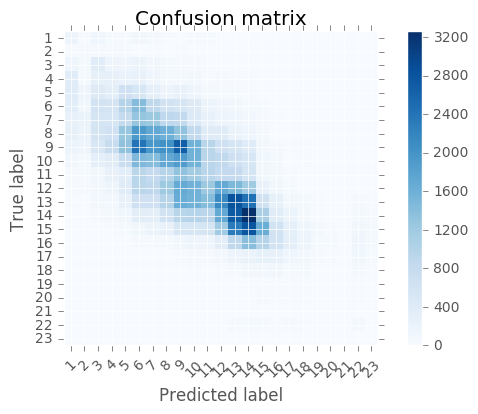

In [18]:
cm = confusion_matrix(trainer.y_test, trainer.y_pred_bin)
cmap = plt.cm.Blues

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

print('Confusion matrix, without normalization')
print(cm)

# thresh = cm.max() / 2.
# for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#     plt.text(j, i, cm[i, j],
#          horizontalalignment="center",
#          color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()

In [21]:
print_full(pd.DataFrame(cm))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,182,19,130,41,48,103,54,20,11,27,39,2,0,8,0,0,0,0,0,0,0,0,0
1,18,30,33,28,34,6,15,7,22,12,1,3,1,0,0,0,0,0,0,0,0,0,0
2,137,63,382,153,150,199,114,74,36,27,13,6,6,8,2,0,0,0,0,0,0,0,0
3,375,44,280,266,228,244,136,71,55,80,18,30,18,15,6,0,2,0,0,0,0,0,0
4,392,154,423,312,665,535,301,191,231,157,74,45,39,24,7,1,2,0,0,3,0,0,0
5,354,115,586,583,974,1426,880,634,558,409,170,135,102,49,41,1,0,0,0,0,0,2,0
6,254,207,542,524,799,1287,1227,871,848,436,249,164,148,91,27,13,7,0,0,0,0,0,0
7,274,168,585,650,1278,1935,1707,1616,1316,849,384,391,210,129,59,10,12,7,0,9,0,2,1
8,198,155,496,788,1328,2408,1957,2028,2678,1583,955,681,541,394,84,30,15,13,0,3,0,4,10
9,105,69,295,363,759,1465,1406,1717,1873,1559,934,856,683,517,118,70,12,22,4,1,0,4,9
